In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
dfr = pd.read_csv('winequality-red.csv',sep = ';')

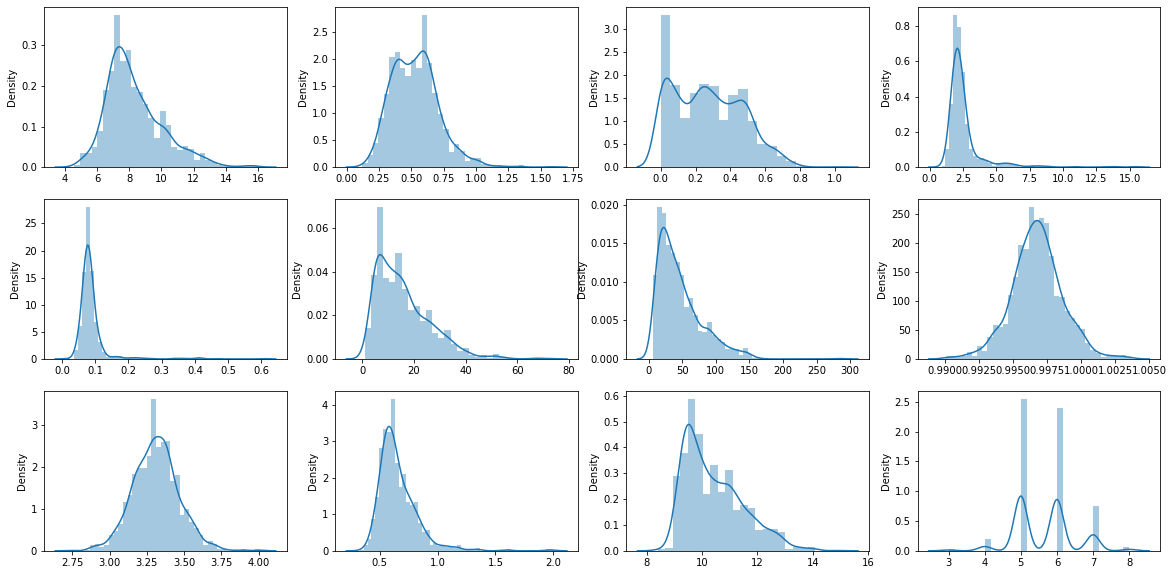

In [3]:
fig, ax = plt.subplots(3,4, figsize=(20,10))
ax = ax.flatten()

for i, column in enumerate(dfr):
    sns.distplot(x = dfr[column], ax = ax[i])
plt.show()

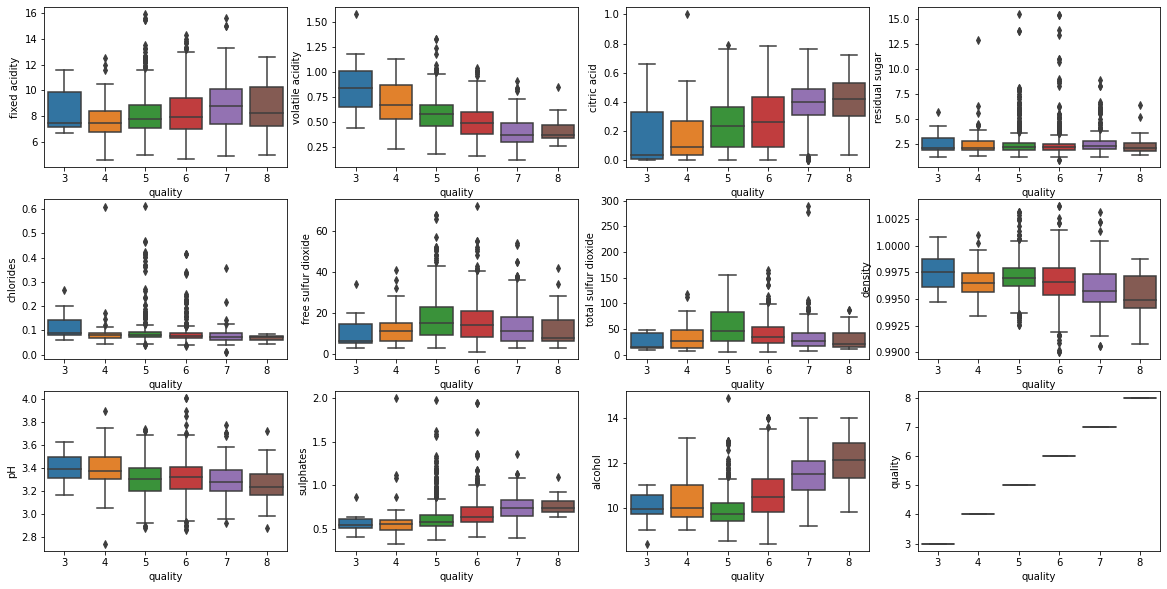

In [4]:
fig, ax = plt.subplots(3,4, figsize=(20,10))
ax = ax.flatten()

for i, column in enumerate(dfr):
    sns.boxplot(x = dfr["quality"], y = dfr[column], ax = ax[i])
plt.show()

<AxesSubplot:>

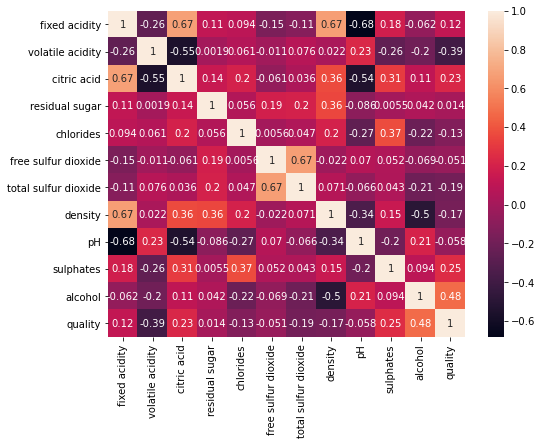

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.heatmap(dfr.corr(), annot=True, ax = ax)

In [5]:
wine = dfr.to_numpy()
X = wine[:, :-1] 
Y = wine[:, -1] 

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X, Y)

RandomForestClassifier()

Text(0.5, 0, 'Feature Importance based on Gini Impurity')

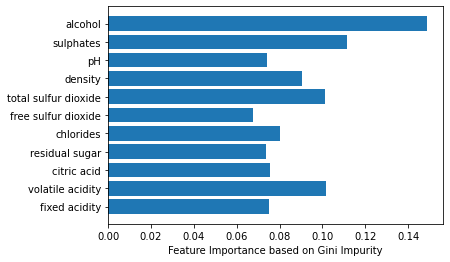

In [32]:
plt.barh(list(df.columns)[:-1],forest.feature_importances_)
plt.xlabel("Feature Importance based on Gini Impurity")

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [7]:
#svc = SVC(kernel = 'linear') 
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=1)
rfecv.fit(X, Y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

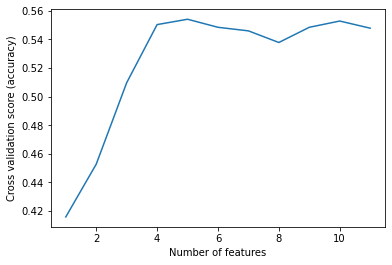

In [8]:
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1,
               len(rfecv.grid_scores_) + 1),
         rfecv.grid_scores_)
plt.show()

In [9]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

In [7]:
from sklearn.feature_selection import SelectKBest
Xsk = SelectKBest(k=5).fit_transform(Xs, Y)

In [8]:
Y = pd.cut(x = dfr["quality"], bins = [0,6.5,9],labels = [0,1])

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [51]:
LogisticRegressionParameters = {'C': [0.01, 0.1, 1, 10, 100]}

In [52]:
LogisticRegressionClf = GridSearchCV(LogisticRegression(), LogisticRegressionParameters, n_jobs=-1)
LogisticRegressionClf.fit(Xsk, Y)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [53]:
print("Best parameters:")
print(LogisticRegressionClf.best_params_)
print()
print("Best score:")
print(LogisticRegressionClf.best_score_)

Best parameters:
{'C': 1}

Best score:
0.8705525078369906


In [56]:
SVCParameters = [
    {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.1, 1, 10], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
]

In [57]:
SVCClf = GridSearchCV(SVC(), SVCParameters, n_jobs=-1)
SVCClf.fit(Xsk, Y)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}])

In [58]:
print("Best parameters:")
print(SVCClf.best_params_)
print()
print("Best score:")
print(SVCClf.best_score_)

Best parameters:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Best score:
0.8824255485893417


In [59]:
KNeighborsClassifierParameters = {'n_neighbors': list(range(1,21)), 'weights': ['uniform', 'distance']}

In [60]:
KNeighborsClassifierClf = GridSearchCV(KNeighborsClassifier(), KNeighborsClassifierParameters, n_jobs=-1)
KNeighborsClassifierClf.fit(Xsk, Y)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [61]:
print("Best parameters:")
print(KNeighborsClassifierClf.best_params_)
print()
print("Best score:")
print(KNeighborsClassifierClf.best_score_)

Best parameters:
{'n_neighbors': 16, 'weights': 'uniform'}

Best score:
0.873671630094044


In [64]:
DecisionTreeClassifierParameters = {'max_depth': list(range(1,11)), 'min_samples_split': list(range(2,11)), 'min_samples_leaf': list(range(1,11)) }

In [65]:
DecisionTreeClassifierClf = GridSearchCV(DecisionTreeClassifier(), DecisionTreeClassifierParameters, n_jobs=-1)
DecisionTreeClassifierClf.fit(Xsk, Y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20]})

In [66]:
print("Best parameters:")
print(DecisionTreeClassifierClf.best_params_)
print()
print("Best score:")
print(DecisionTreeClassifierClf.best_score_)

Best parameters:
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best score:
0.8786794670846394


In [10]:
RandomForestClassifierParameters = {'n_estimators': list(range(10,100,10))}

In [11]:
RandomForestClassifierClf = GridSearchCV(RandomForestClassifier(), RandomForestClassifierParameters, n_jobs=-1)
RandomForestClassifierClf.fit(Xsk, Y)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

In [12]:
print("Best parameters:")
print(RandomForestClassifierClf.best_params_)
print()
print("Best score:")
print(RandomForestClassifierClf.best_score_)

Best parameters:
{'n_estimators': 50}

Best score:
0.8755544670846394


In [15]:
AdaBoostClassifierParameters = {'n_estimators': list(range(10,100,10)), "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0]}

In [16]:
AdaBoostClassifierClf = GridSearchCV(AdaBoostClassifier(), AdaBoostClassifierParameters, n_jobs=-1)
AdaBoostClassifierClf.fit(Xsk, Y)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

In [17]:
print("Best parameters:")
print(AdaBoostClassifierClf.best_params_)
print()
print("Best score:")
print(AdaBoostClassifierClf.best_score_)

Best parameters:
{'learning_rate': 0.1, 'n_estimators': 40}

Best score:
0.8818005485893415


In [18]:
from sklearn.ensemble import VotingClassifier

In [20]:
clf1 = Perceptron()
clf2 = LogisticRegression(C=1)
clf3 = SVC(C=10, gamma=0.1, kernel='rbf')
clf4 = KNeighborsClassifier(n_neighbors=16, weights='uniform')
clf5 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2)
clf6 = RandomForestClassifier(n_estimators=50)
clf7 = AdaBoostClassifier(learning_rate=0.1, n_estimators=40)
clf8 = GaussianNB()

In [35]:
eclf1 = VotingClassifier(estimators=[('P',clf1),('LG',clf2),('SVC',clf3),('KNN',clf4),('DT',clf5),('RF',clf6),('ADA',clf7),('GNB',clf8)], voting = 'hard')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(Xsk, Y)

In [38]:
eclf1 = eclf1.fit(X_train, y_train)

In [39]:
y_pred = eclf1.predict(X_test)

In [40]:
eclf1.score(X_test,y_test)

0.9125

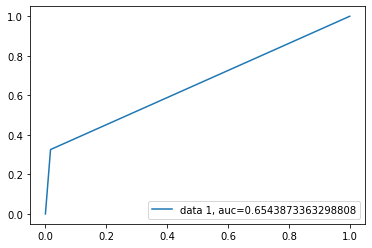

In [42]:
from sklearn import metrics
y_pred_proba = eclf1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()